<a href="https://colab.research.google.com/github/ManjuVijayakumar/ICTAK_DSA_FinalProject/blob/main/Crop_Yield_prediction_regression_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Display all columns
pd.set_option('display.max_columns', None)

pd.set_option('display.float_format', '{:.5f}'.format)

In [2]:
# Loading the dataset
file_url= 'https://raw.githubusercontent.com/ManjuVijayakumar/ICTAK_DSA_FinalProject/refs/heads/main/crop_yield_main.csv'
yield_df = pd.read_csv(file_url, index_col= 'Unnamed: 0')

# First 5 rows
yield_df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Country,Soil_type,Annual_mean_temp,Apr_temp,Aug_temp,Dec_temp,Feb_temp,Jan_temp,Jul_temp,Jun_temp,Mar_temp,May_temp,Monsoon_temp,Nov_temp,Oct_temp,Post_Monsoon_temp,Sep_temp,Summer_temp,Winter_temp,JAN_rain,FEB_rain,MAR_rain,APR_rain,MAY_rain,JUN_rain,JUL_rain,AUG_rain,SEP_rain,OCT_rain,NOV_rain,DEC_rain,Jan-Feb_rain,Mar-May_rain,Jun-Sep_rain,Oct-Dec_rain
0,Arecanut,1997,Whole Year,Assam,73814.00000,56708,2372.20000,7024878.38000,22882.34000,0.79609,India,alluvial,22.54000,22.19000,27.55000,16.67000,16.84000,15.53000,27.16000,26.37000,21.93000,25.28000,26.78000,21.11000,23.88000,20.55000,26.02000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000
1,Arhar/Tur,1997,Kharif,Assam,6637.00000,4685,2372.20000,631643.29000,2057.47000,0.71043,India,alluvial,22.54000,22.19000,27.55000,16.67000,16.84000,15.53000,27.16000,26.37000,21.93000,25.28000,26.78000,21.11000,23.88000,20.55000,26.02000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000
2,Castor seed,1997,Kharif,Assam,796.00000,22,2372.20000,75755.32000,246.76000,0.23833,India,alluvial,22.54000,22.19000,27.55000,16.67000,16.84000,15.53000,27.16000,26.37000,21.93000,25.28000,26.78000,21.11000,23.88000,20.55000,26.02000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000
3,Coconut,1997,Whole Year,Assam,19656.00000,126905000,2372.20000,1870661.52000,6093.36000,5238.05174,India,alluvial,22.54000,22.19000,27.55000,16.67000,16.84000,15.53000,27.16000,26.37000,21.93000,25.28000,26.78000,21.11000,23.88000,20.55000,26.02000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000
4,Cotton(lint),1997,Kharif,Assam,1739.00000,794,2372.20000,165500.63000,539.09000,0.42091,India,alluvial,22.54000,22.19000,27.55000,16.67000,16.84000,15.53000,27.16000,26.37000,21.93000,25.28000,26.78000,21.11000,23.88000,20.55000,26.02000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000


In [3]:
# Last 5 rows
yield_df.tail()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Country,Soil_type,Annual_mean_temp,Apr_temp,Aug_temp,Dec_temp,Feb_temp,Jan_temp,Jul_temp,Jun_temp,Mar_temp,May_temp,Monsoon_temp,Nov_temp,Oct_temp,Post_Monsoon_temp,Sep_temp,Summer_temp,Winter_temp,JAN_rain,FEB_rain,MAR_rain,APR_rain,MAY_rain,JUN_rain,JUL_rain,AUG_rain,SEP_rain,OCT_rain,NOV_rain,DEC_rain,Jan-Feb_rain,Mar-May_rain,Jun-Sep_rain,Oct-Dec_rain
19684,Small millets,1998,Kharif,Nagaland,4000.00000,2000,2225.40000,395200.00000,1160.00000,0.50000,India,red,19.37000,19.44000,22.98000,14.60000,14.53000,12.37000,22.76000,22.94000,16.07000,22.30000,22.98000,18.51000,22.77000,18.63000,23.24000,19.27000,13.45000,28.10000,31.60000,136.40000,164.60000,352.20000,297.60000,480.60000,367.30000,222.30000,97.90000,46.50000,0.30000,59.70000,653.20000,1367.90000,144.70000
19685,Wheat,1998,Rabi,Nagaland,1000.00000,3000,2225.40000,98800.00000,290.00000,3.00000,India,red,19.37000,19.44000,22.98000,14.60000,14.53000,12.37000,22.76000,22.94000,16.07000,22.30000,22.98000,18.51000,22.77000,18.63000,23.24000,19.27000,13.45000,28.10000,31.60000,136.40000,164.60000,352.20000,297.60000,480.60000,367.30000,222.30000,97.90000,46.50000,0.30000,59.70000,653.20000,1367.90000,144.70000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.00000,440900,1295.90000,29586735.11000,96373.73000,1.28500,India,alluvial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.40000,55.60000,164.10000,144.50000,89.10000,81.20000,126.60000,270.20000,75.40000,77.30000,84.30000,59.20000,124.00000,397.70000,553.40000,220.80000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.00000,5488,1295.90000,26242746.82000,85481.26000,0.01667,India,alluvial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.40000,55.60000,164.10000,144.50000,89.10000,81.20000,126.60000,270.20000,75.40000,77.30000,84.30000,59.20000,124.00000,397.70000,553.40000,220.80000
19688,Wheat,1997,Rabi,Jammu and Kashmir,239344.00000,392160,1295.90000,22778368.48000,74196.64000,1.26182,India,alluvial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.40000,55.60000,164.10000,144.50000,89.10000,81.20000,126.60000,270.20000,75.40000,77.30000,84.30000,59.20000,124.00000,397.70000,553.40000,220.80000


## **Exploratory Data Analysis**

In [4]:
# Basic info
print('Dataset has {} rows and {} columns.'.format(yield_df.shape[0], yield_df.shape[1]))

Dataset has 19689 rows and 45 columns.


In [5]:
# Column names
yield_df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield', 'Country',
       'Soil_type', 'Annual_mean_temp', 'Apr_temp', 'Aug_temp', 'Dec_temp',
       'Feb_temp', 'Jan_temp', 'Jul_temp', 'Jun_temp', 'Mar_temp', 'May_temp',
       'Monsoon_temp', 'Nov_temp', 'Oct_temp', 'Post_Monsoon_temp', 'Sep_temp',
       'Summer_temp', 'Winter_temp', 'JAN_rain', 'FEB_rain', 'MAR_rain',
       'APR_rain', 'MAY_rain', 'JUN_rain', 'JUL_rain', 'AUG_rain', 'SEP_rain',
       'OCT_rain', 'NOV_rain', 'DEC_rain', 'Jan-Feb_rain', 'Mar-May_rain',
       'Jun-Sep_rain', 'Oct-Dec_rain'],
      dtype='object')

In [6]:
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19689 entries, 0 to 19688
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Crop               19689 non-null  object 
 1   Crop_Year          19689 non-null  int64  
 2   Season             19689 non-null  object 
 3   State              19689 non-null  object 
 4   Area               19689 non-null  float64
 5   Production         19689 non-null  int64  
 6   Annual_Rainfall    19689 non-null  float64
 7   Fertilizer         19689 non-null  float64
 8   Pesticide          19689 non-null  float64
 9   Yield              19689 non-null  float64
 10  Country            19689 non-null  object 
 11  Soil_type          19689 non-null  object 
 12  Annual_mean_temp   18661 non-null  float64
 13  Apr_temp           18661 non-null  float64
 14  Aug_temp           18661 non-null  float64
 15  Dec_temp           18661 non-null  float64
 16  Feb_temp           18661 no

In [7]:
# Summary Statistics
pd.options.display.float_format = '{:2f}'.format
yield_df.describe(include= ['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
Crop_Year,19689.000000,2009.127584,6.498099,1997.000000,2004.000000,2010.000000,2015.000000,2020.000000
Area,19689.000000,179926.570308,732828.675888,0.500000,1390.000000,9317.000000,75112.000000,50808100.000000
Production,19689.000000,16435941.273097,263056839.812567,0.000000,1393.000000,13804.000000,122718.000000,6326000000.000000
Annual_Rainfall,19689.000000,2116.546236,1436.688844,274.700000,1194.700000,1633.000000,2468.300000,7155.300000
Fertilizer,19689.000000,24103312.448806,94946004.482527,54.170000,188014.620000,1234957.440000,10003847.200000,4835406877.000000
Pesticide,19689.000000,48848.353392,213287.354860,0.090000,356.700000,2421.900000,20041.700000,15750511.000000
Yield,19689.000000,79.954009,878.306193,0.000000,0.600000,1.030000,2.388889,21105.000000
Annual_mean_temp,18661.000000,24.292053,4.657964,3.830000,23.600000,26.010000,26.790000,29.080000
Apr_temp,18661.000000,27.224814,5.662884,2.820000,24.920000,29.600000,30.770000,33.020000
Aug_temp,18661.000000,26.474456,3.382358,10.420000,25.460000,27.310000,28.560000,31.290000


In [8]:
yield_df.describe(include= 'object').T

,count,unique,top,freq
Crop,19689,55,Rice,1197
Season,19689,6,Kharif,8232
State,19689,30,Karnataka,1432
Country,19689,1,India,19689
Soil_type,19689,7,alluvial,7437


Rice is the most frequenctly occurring crop <br>
6 unique seasons. Kharif the most common season

Missing value analysis

<Axes: >

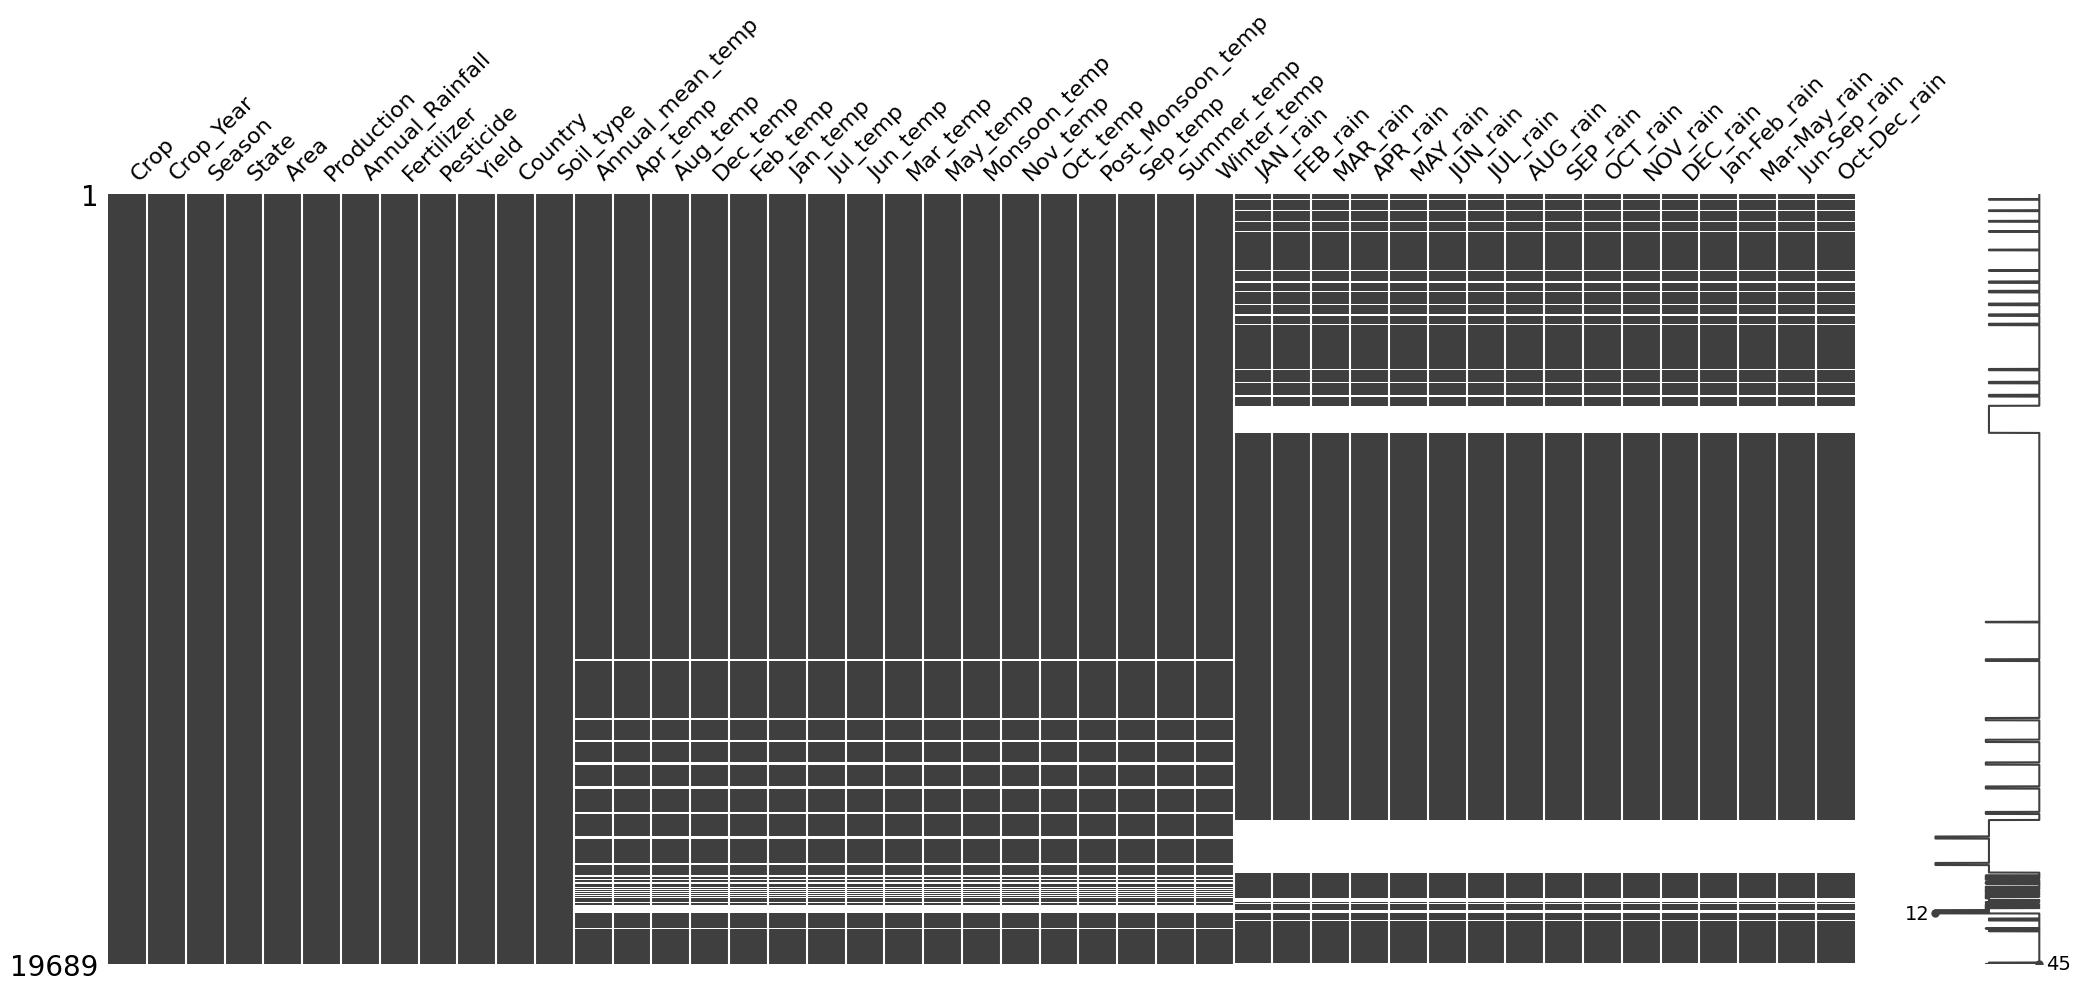

In [9]:
import missingno

missingno.matrix(yield_df)

In [10]:
# Calculate percentage of missing values per columns
missing_percent= (yield_df.isnull().sum() / len(yield_df)) * 100

# Combine with Counts
missing_data= pd.DataFrame(
    {
        'Missing Values' : yield_df.isnull().sum(),
        'Percentage (%)' : missing_percent
    }
).sort_values(by= 'Percentage (%)', ascending= False)

missing_data= missing_data[missing_data['Missing Values'] > 0]

print(missing_data)

                   Missing Values  Percentage (%)
APR_rain                     2766       14.048453
MAY_rain                     2766       14.048453
JUN_rain                     2766       14.048453
JUL_rain                     2766       14.048453
AUG_rain                     2766       14.048453
SEP_rain                     2766       14.048453
OCT_rain                     2766       14.048453
NOV_rain                     2766       14.048453
DEC_rain                     2766       14.048453
Jan-Feb_rain                 2766       14.048453
Mar-May_rain                 2766       14.048453
Jun-Sep_rain                 2766       14.048453
Oct-Dec_rain                 2766       14.048453
FEB_rain                     2766       14.048453
MAR_rain                     2766       14.048453
JAN_rain                     2766       14.048453
Winter_temp                  1028        5.221189
Oct_temp                     1028        5.221189
Summer_temp                  1028        5.221189


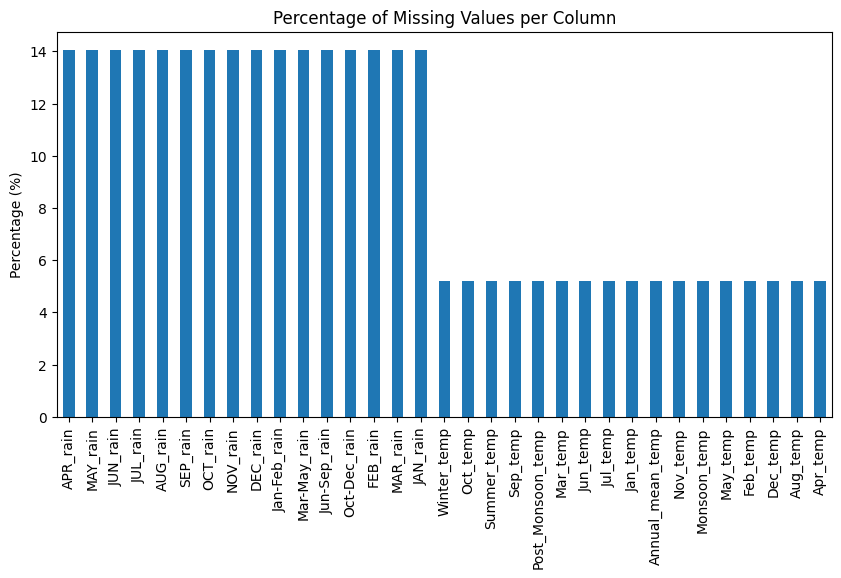

In [11]:
missing_data['Percentage (%)'].plot(kind='bar', figsize=(10,5))
plt.title('Percentage of Missing Values per Column')
plt.ylabel('Percentage (%)')
plt.show()

In [12]:
yield_df.Crop_Year.unique()

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020])

In [13]:
yield_df.State.value_counts()

,count
State,
Karnataka,1432
Andhra Pradesh,1266
West Bengal,1094
Chhattisgarh,915
Bihar,896
Madhya Pradesh,845
Uttar Pradesh,825
Tamil Nadu,822
Gujarat,817


In [14]:
# 631+397
# Temperature detail of Telangana and JK missing from the dataset. Statistical imputation would make little sense

yield_df= yield_df.query("State not in ['Jammu and Kashmir', 'Telangana']")

missing_data= pd.DataFrame(
    {
        'Missing Values' : yield_df.isnull().sum(),
        'Percentage (%)' : missing_percent
    }
).sort_values(by= 'Percentage (%)', ascending= False)

missing_data= missing_data[missing_data['Missing Values'] > 0]

print(missing_data)

              Missing Values  Percentage (%)
APR_rain                2580       14.048453
MAY_rain                2580       14.048453
JUN_rain                2580       14.048453
JUL_rain                2580       14.048453
AUG_rain                2580       14.048453
SEP_rain                2580       14.048453
OCT_rain                2580       14.048453
NOV_rain                2580       14.048453
DEC_rain                2580       14.048453
Jan-Feb_rain            2580       14.048453
Mar-May_rain            2580       14.048453
Jun-Sep_rain            2580       14.048453
Oct-Dec_rain            2580       14.048453
FEB_rain                2580       14.048453
MAR_rain                2580       14.048453
JAN_rain                2580       14.048453


In [15]:
# Analysing null values in Rain features

rain_cols = ['JAN_rain', 'FEB_rain', 'MAR_rain','APR_rain', 'MAY_rain', 'JUN_rain',
             'JUL_rain', 'AUG_rain', 'SEP_rain','OCT_rain', 'NOV_rain', 'DEC_rain',
             'Jan-Feb_rain', 'Mar-May_rain','Jun-Sep_rain', 'Oct-Dec_rain']


all_null_rain = yield_df[rain_cols].isnull().all(axis= 1).sum()
print('No of rows with no rainfall details available:', all_null_rain)

No of rows with no rainfall details available: 2580


In [16]:
# yield_df.to_csv('working_file.csv')

In [17]:
null_by_year = (
            yield_df.groupby('Crop_Year')[rain_cols]
            .apply(lambda x: x.isnull().all().all())  # True if *all* rain cols null for the entire year
              )

# Filter years where condition is True
years_with_all_null_rain = null_by_year[null_by_year].index.tolist()

years_with_all_null_rain

[2018, 2019, 2020]

In [18]:
# Rainfall data for the year 2018, 2019 and 2020 are not available for any of the States. Since imputing for entire year values would be less sensible
# dropping rows have all rainfall details as NaN

yield_df= yield_df.dropna(subset= rain_cols, how= 'all')

missing_data= pd.DataFrame(
    {
        'Missing Values' : yield_df.isnull().sum(),
        'Percentage (%)' : missing_percent
    }
).sort_values(by= 'Percentage (%)', ascending= False)

missing_data= missing_data[missing_data['Missing Values'] > 0]

print(missing_data)

Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []


In [19]:
# yield_df.to_csv('working_file.csv')
yield_df.shape

(16081, 45)

In [20]:
yield_df.sample(5)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Country,Soil_type,Annual_mean_temp,Apr_temp,Aug_temp,Dec_temp,Feb_temp,Jan_temp,Jul_temp,Jun_temp,Mar_temp,May_temp,Monsoon_temp,Nov_temp,Oct_temp,Post_Monsoon_temp,Sep_temp,Summer_temp,Winter_temp,JAN_rain,FEB_rain,MAR_rain,APR_rain,MAY_rain,JUN_rain,JUL_rain,AUG_rain,SEP_rain,OCT_rain,NOV_rain,DEC_rain,Jan-Feb_rain,Mar-May_rain,Jun-Sep_rain,Oct-Dec_rain
11726,Cowpea(Lobia),2010,Kharif,Mizoram,1381.000000,1786,2295.200000,229397.910000,331.440000,1.145000,India,red,22.220000,24.060000,24.660000,17.530000,18.480000,16.280000,24.330000,23.890000,22.540000,24.650000,24.370000,21.590000,24.050000,21.060000,24.590000,23.750000,17.380000,1.000000,7.900000,85.800000,161.500000,294.000000,411.600000,367.500000,393.200000,309.800000,220.200000,9.200000,33.500000,8.900000,541.400000,1482.000000,262.900000
499,Coriander,2000,Whole Year,Andhra Pradesh,58441.000000,19993,1863.600000,5737152.970000,15194.660000,0.395000,India,red and yellow,27.690000,32.390000,27.780000,22.690000,25.990000,23.980000,28.000000,29.500000,28.490000,32.440000,28.370000,25.260000,27.580000,25.180000,28.180000,31.110000,24.990000,0.100000,76.700000,0.900000,41.200000,142.200000,293.200000,248.800000,553.000000,205.800000,204.300000,48.300000,49.100000,76.800000,184.400000,1300.700000,301.700000
7702,Sunflower,2001,Summer,Maharashtra,5800.000000,5200,5035.000000,592354.000000,1508.000000,1.199444,India,black,26.900000,30.920000,26.200000,22.780000,24.980000,22.420000,26.600000,28.750000,28.130000,32.840000,27.290000,24.750000,26.800000,24.780000,27.590000,30.630000,23.700000,23.700000,0.600000,16.000000,35.700000,76.600000,1185.300000,1311.400000,1387.800000,466.100000,516.800000,14.300000,0.500000,24.300000,128.500000,4350.500000,531.800000
9764,Rice,2006,Kharif,Gujarat,655600.000000,1045200,2179.800000,83726676.000000,144232.000000,1.601875,India,black,27.300000,30.100000,27.300000,22.080000,24.590000,20.240000,29.010000,31.430000,26.440000,32.890000,29.110000,25.770000,29.090000,25.650000,28.690000,29.810000,22.420000,0.000000,0.000000,2.700000,0.000000,0.200000,189.700000,949.400000,814.600000,208.800000,10.600000,3.200000,0.600000,0.000000,3.000000,2162.600000,14.400000
19564,Urad,2014,Winter,Odisha,56121.000000,20452,1536.900000,8472026.160000,18519.930000,0.351034,India,red,25.910000,29.940000,27.460000,19.460000,22.120000,20.350000,27.680000,30.820000,25.800000,31.170000,28.300000,22.860000,26.070000,22.800000,27.240000,28.970000,21.240000,0.000000,17.600000,25.100000,11.700000,111.900000,92.200000,496.200000,386.300000,281.100000,111.800000,2.200000,0.900000,17.700000,148.700000,1255.700000,114.800000


The rainfall data for years 2018, 2019, and 2020 were found to be completely missing across all rainfall-related features.
Since imputation was not meaningful without any reference values for these years, the corresponding rows were removed from the dataset to maintain data quality and ensure accurate model training.

In [21]:
# Checking for duplicate
yield_df.duplicated().sum()

np.int64(0)

In [22]:
# There are no duplicate rows available in the dataset

### Data exploration

Final dataset has agricultural data for multiple crops cultivated across various Indian States from the year **1997 to 2020**

In [23]:
print('Dataset has {} rows and {} columns'.format(yield_df.shape[0], yield_df.shape[1]))

Dataset has 16081 rows and 45 columns


Univariate Analysis

In [24]:
# Target field exploration

yield_df.Yield.describe()

,Yield
count,16081.000000
mean,72.176231
std,807.223348
min,0.000000
25%,0.586000
50%,1.018947
75%,2.320000
max,14794.630000


Yield is highly positively skewed. Log transformation to be applied to features that are highly skewed.

Log-transforming it helps stabilize variance, reduce skewness, and makes relationships with predictors more linear, which is better for correlation and modeling.

When to log-transform other features too
You’d apply log transformation to other numeric features only if:
They have a right-skewed distribution (e.g., rainfall, fertilizer, production).
The feature has positive values only (log doesn’t work with zero or negative).

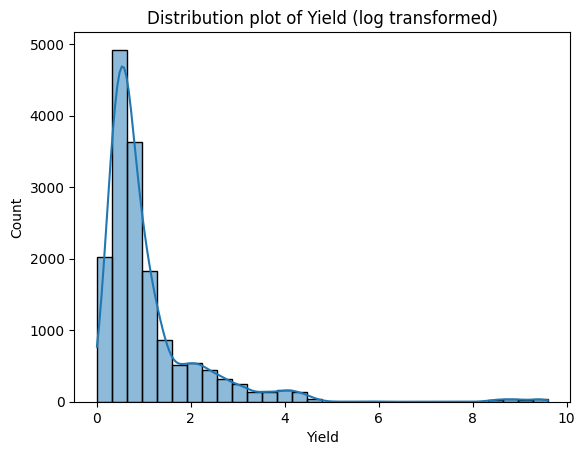

In [25]:
# Target feature exploration

sns.histplot(np.log1p(yield_df.Yield), bins= 30, kde= True)
plt.title('Distribution plot of Yield (log transformed)')
plt.show()

In [26]:
# Unique values of categorical features

for col in yield_df.select_dtypes(include= 'object'):
  print()
  print(col+ ':')
  print(set(yield_df[col].tolist()))
  print()


Crop:
{'Masoor', 'Other  Rabi pulses', 'Linseed', 'Castor seed', 'Arhar/Tur', 'Rice', 'Tobacco', 'Moth', 'other oilseeds', 'Mesta', 'Sugarcane', 'Dry chillies', 'Wheat', 'Bajra', 'Oilseeds total', 'Sweet potato', 'Soyabean', 'Cotton(lint)', 'Horse-gram', 'Garlic', 'Gram', 'Onion', 'Black pepper', 'Barley', 'Guar seed', 'Niger seed', 'Cashewnut', 'Cardamom', 'Ragi', 'Jowar', 'Safflower', 'Peas & beans (Pulses)', 'Cowpea(Lobia)', 'Coconut ', 'Rapeseed &Mustard', 'Khesari', 'Arecanut', 'Ginger', 'Sannhamp', 'Small millets', 'Other Summer Pulses', 'Jute', 'Turmeric', 'Banana', 'Maize', 'Moong(Green Gram)', 'Other Kharif pulses', 'Sunflower', 'Urad', 'Potato', 'Other Cereals', 'Groundnut', 'Sesamum', 'Coriander', 'Tapioca'}


Season:
{'Whole Year ', 'Kharif     ', 'Summer     ', 'Rabi       ', 'Autumn     ', 'Winter     '}


State:
{'Bihar', 'Uttar Pradesh', 'Kerala', 'Jharkhand', 'Assam', 'Goa', 'Arunachal Pradesh', 'Madhya Pradesh', 'Uttarakhand', 'Tripura', 'Meghalaya', 'Chhattisgarh', 

In [27]:
yield_df.Annual_Rainfall.describe()

,Annual_Rainfall
count,16081.000000
mean,2270.337945
std,1510.330861
min,274.700000
25%,1247.000000
50%,1816.400000
75%,2711.500000
max,7155.300000


Bivariate Analysis

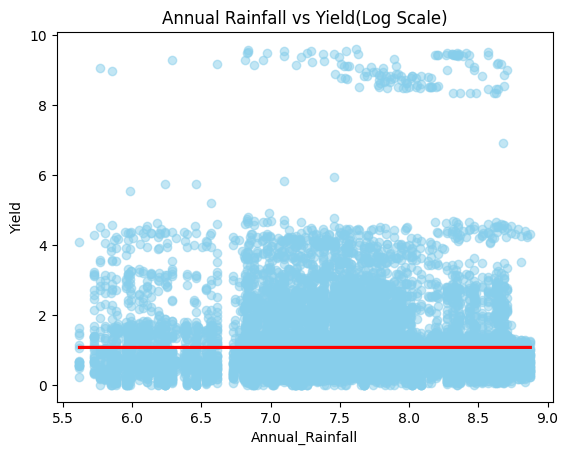

In [28]:
# sns.scatterplot(x= yield_df.Annual_Rainfall, y= yield_df.Yield)
# sns.scatterplot(x= yield_df.Annual_Rainfall, y= np.log1p(yield_df.Yield))

sns.regplot (
    x= np.log1p(yield_df.Annual_Rainfall),
    y= np.log1p(yield_df.Yield),
    scatter_kws= {'alpha':0.5, 'color':'skyblue'},
    line_kws= {'color':'red'}
)
plt.title('Annual Rainfall vs Yield(Log Scale)')
plt.show()

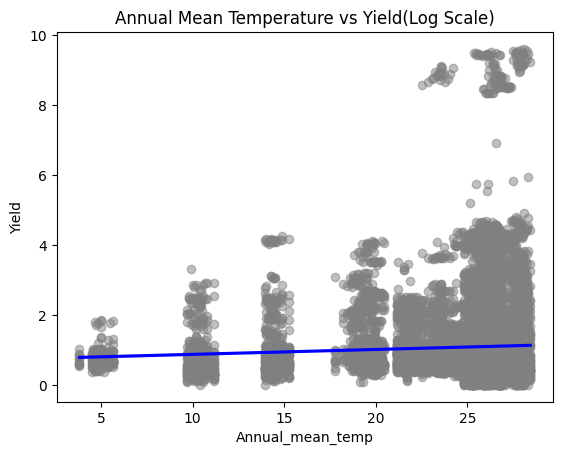

In [29]:
# sns.scatterplot(x= yield_df.Annual_mean_temp, y= np.log1p(yield_df.Yield))
sns.regplot (
    x= yield_df.Annual_mean_temp,
    y= np.log1p(yield_df.Yield),
    scatter_kws= {'alpha':0.5, 'color':'grey'},
    line_kws= {'color':'blue'}
)
plt.title('Annual Mean Temperature vs Yield(Log Scale)')
plt.show()

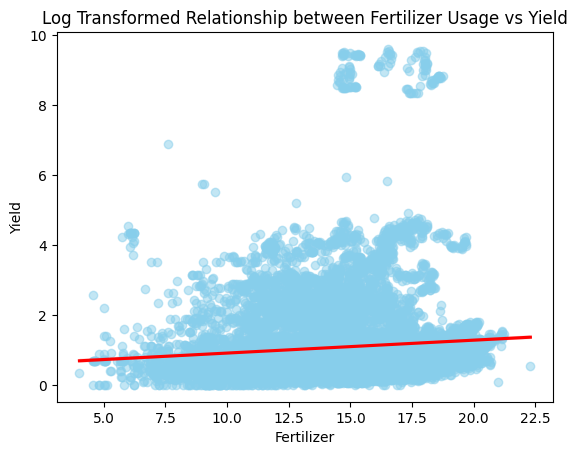

In [30]:
# sns.scatterplot(x= np.log1p(yield_df.Fertilizer), y= np.log1p(yield_df.Yield))

sns.regplot (
    x= np.log1p(yield_df.Fertilizer),
    y= np.log1p(yield_df.Yield),
    scatter_kws= {'alpha':0.5, 'color':'skyblue'},
    line_kws= {'color':'red'}
)
plt.title('Log Transformed Relationship between Fertilizer Usage vs Yield')
plt.show()

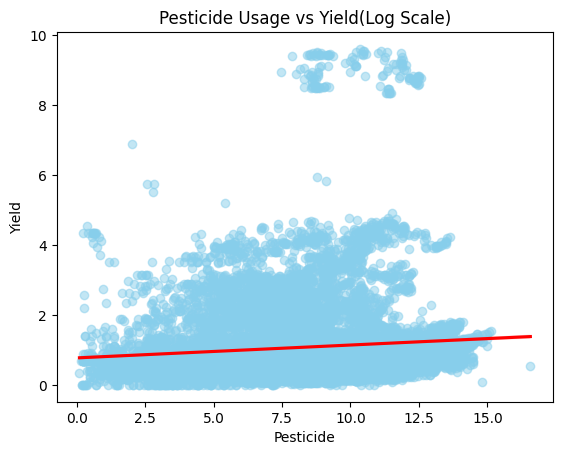

In [31]:
# sns.scatterplot(x= np.log1p(yield_df.Pesticide), y= np.log1p(yield_df.Yield))
sns.regplot (
    x= np.log1p(yield_df.Pesticide),
    y= np.log1p(yield_df.Yield),
    scatter_kws= {'alpha':0.5, 'color':'skyblue'},
    line_kws= {'color':'red'}
)
plt.title('Pesticide Usage vs Yield(Log Scale)')
plt.show()

In [32]:
# yield_df.Fertilizer.describe()

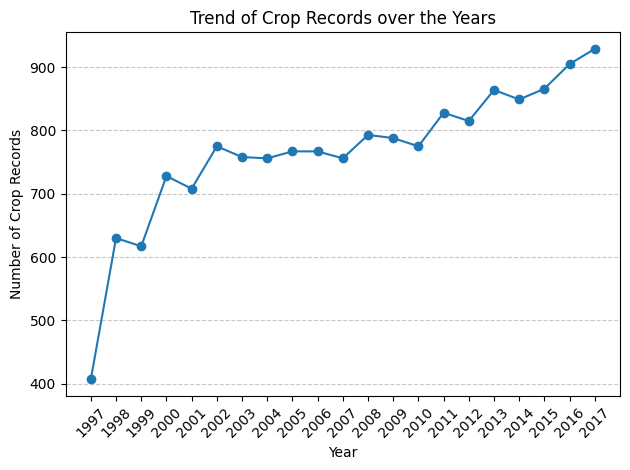

In [33]:
# Count details for each crop year

year_counts= yield_df.Crop_Year.value_counts().sort_index()
# plt.bar(year_counts.index, year_counts.values, color= 'skyblue')
plt.plot(year_counts.index.astype(str), year_counts.values, marker= 'o')
plt.xlabel('Year')
plt.ylabel('Number of Crop Records')
plt.title('Trend of Crop Records over the Years')
plt.xticks(rotation= 45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The crop years range from 1997 to 2017, with 2017 having the highest number of records and 1997 the lowest.

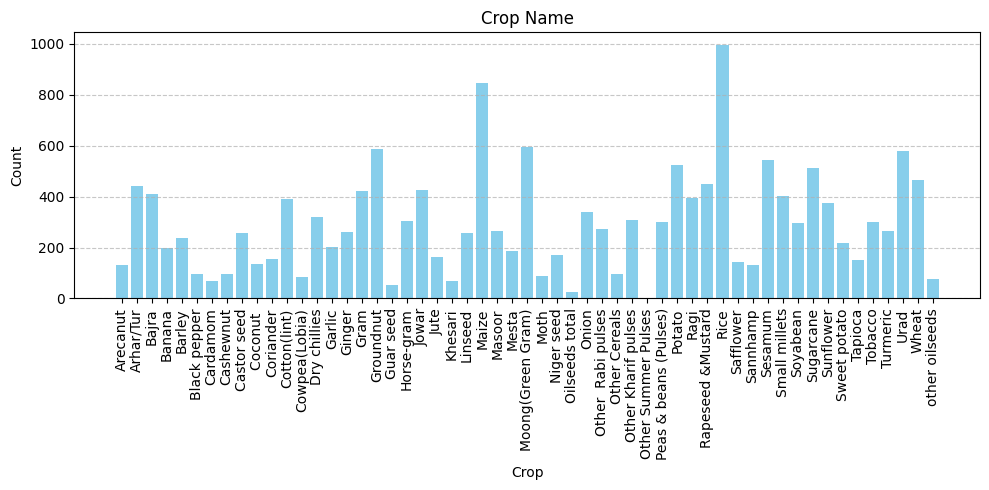

In [34]:
# Count details for each crop. Top 10

crop_counts= yield_df.Crop.value_counts().sort_index()

plt.figure(figsize= (10, 5))
plt.bar(crop_counts.index, crop_counts.values, color= 'skyblue')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.title('Crop Name')
plt.xticks(rotation= 90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Rice and Maize stands top in Crop cultivation

In [35]:
# Count details for each crop. Bottom 10

yield_df.Crop.value_counts(ascending= False).tail(10)

,count
Crop,
Other Cereals,95
Black pepper,95
Moth,89
Cowpea(Lobia),84
other oilseeds,77
Cardamom,68
Khesari,67
Guar seed,53
Oilseeds total,25


Note:-- Handling Low-Frequency Crops: Crops with low frequency, especially those with less than 30 records, could either be excluded or grouped into broader categories (e.g., "Other" crops).

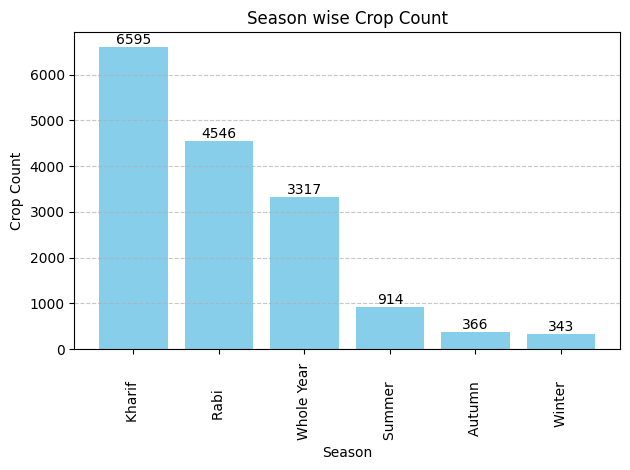

In [36]:
# Count details for each Season

season_counts= yield_df.Season.value_counts().sort_values(ascending= False)

bars = plt.bar(season_counts.index, season_counts.values, color= 'skyblue')
# Add text labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,   # x position (center of bar)
        height,                            # y position (top of bar)
        f'{int(height)}',                  # label text (convert to int)
        ha='center', va='bottom', fontsize=10
    )
plt.xlabel('Season')
plt.ylabel('Crop Count')
plt.title('Season wise Crop Count')
plt.xticks(rotation= 90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Most Frequent Season: Kharif (6595 records) is the most prevalent season, followed by Rabi (4546 records) and Whole Year (3317 records). These are the dominant seasons for crop cultivation in the dataset.
Less Frequent Seasons: Summer, Autumn, and Winter seasons have much fewer records, with Winter having the least (343 records).

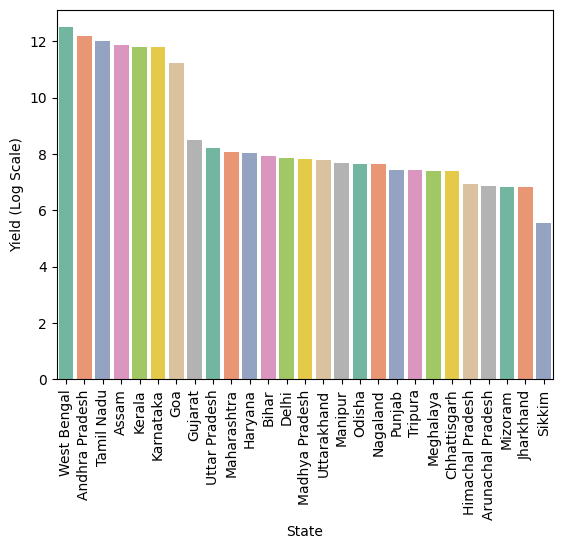

In [37]:
df_state= yield_df.groupby('State', as_index= False)['Yield'].sum().sort_values(by= 'Yield', ascending= False)

sns.barplot(x= df_state.State, y= np.log1p(df_state.Yield), palette= 'Set2')
plt.xticks(rotation = 90)
plt.ylabel('Yield (Log Scale)')
plt.show()

West Bengal and Andhra Pradesh stands at the top with highest total crop yield

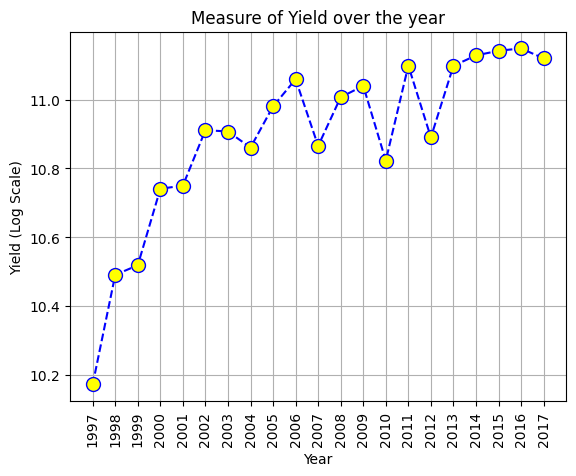

In [38]:
# Yield trend over the year

df_state= yield_df.groupby('Crop_Year', as_index= False)['Yield'].sum()

plt.plot(df_state['Crop_Year'].astype(str), np.log1p(df_state['Yield']),color='blue', linestyle='dashed',
         marker='o',markersize=10, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Yield (Log Scale)')
plt.title('Measure of Yield over the year')
plt.xticks(rotation= 90)
plt.grid()
plt.show()

# log1p = log(1 + x) to handle 0

Highest yield found to be in year 2016 and lowest in 1997

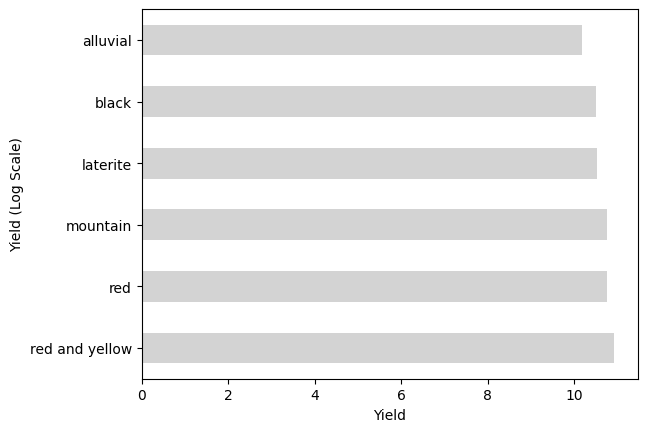

In [39]:
df_soiltype= yield_df.groupby(['Soil_type'], as_index= False)['Yield'].sum()

sns.barplot(y= df_soiltype.Soil_type, x= np.log1p(df_state.Yield), width= 0.5, color= 'lightgrey')
plt.ylabel('Yield (Log Scale)')
plt.show()

Highest yield found to be in regions having red and yellow soil type. The availabe feature is a generalized detail of soil pertaining to that State not specific to any region. Soil types differs within State.

In [40]:
# post, pre temp vs yield
# jan-feb, mar-may rain vs yield
# which plot to be used
# chatgpt

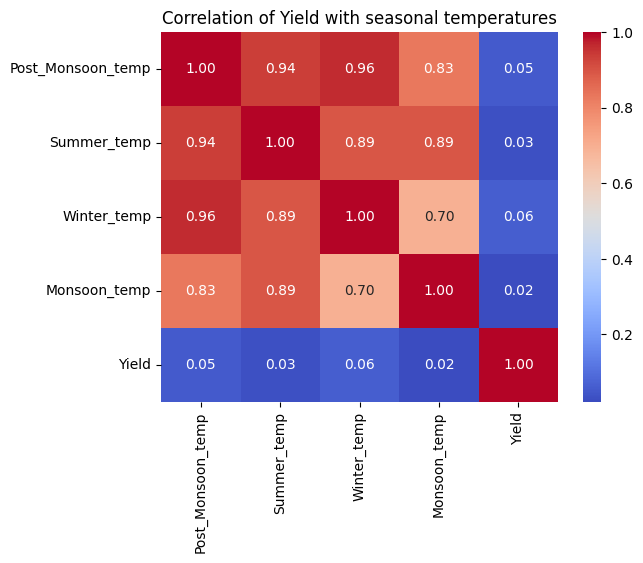

In [41]:
# Temparature periods' correlation with Yield

temp_cols = ['Post_Monsoon_temp','Summer_temp','Winter_temp','Monsoon_temp','Yield']
corr= yield_df[temp_cols].corr()

sns.heatmap(corr, annot= True, cmap= 'coolwarm', fmt= ".2f")
plt.title('Correlation of Yield with seasonal temperatures')
plt.show()

There is no noticeable effect of Temperature on yield. Crop yield depends on a complex interaction of multiple factors.

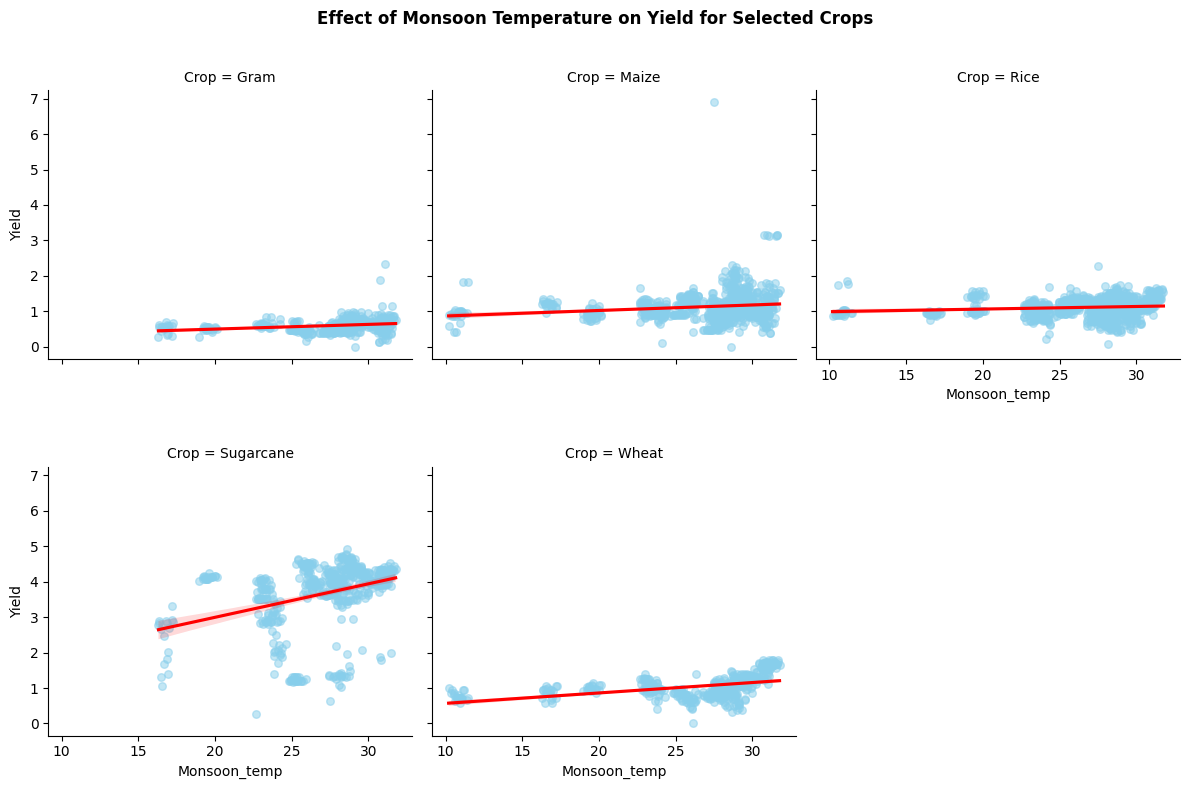

In [42]:
# Affect of monsoon temperature on Yield, crop by crop

selected_crops= ['Rice', 'Wheat', 'Maize', 'Sugarcane', 'Gram' ]
subset_df = yield_df[yield_df['Crop'].isin(selected_crops)]
subset_df.Yield= np.log1p(subset_df.Yield)

# Create the lmplot
# plt.figure(figsize= (10, 10))
g= sns.lmplot( x= 'Monsoon_temp', y= 'Yield', hue= 'Crop', data= subset_df,
            col= 'Crop', col_wrap=3, height=4, aspect=1,
            scatter_kws={'alpha': 0.5, 's': 30, 'color': 'skyblue'},
            line_kws={'color': 'red'}
        )
g.fig.suptitle('Effect of Monsoon Temperature on Yield for Selected Crops', fontsize=12, fontweight='bold')
g.fig.subplots_adjust(top=0.88, hspace=0.4)

plt.show()

lmplot shows the affect of temperature on each crop

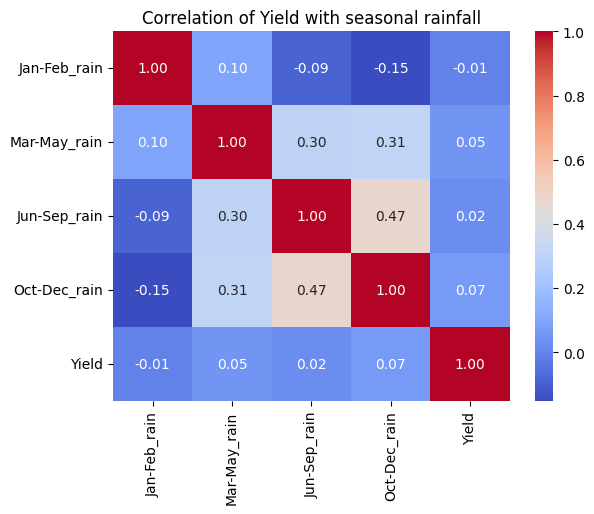

In [43]:
# Temparature periods' correlation with Yield

rain_cols = ['Jan-Feb_rain','Mar-May_rain','Jun-Sep_rain','Oct-Dec_rain','Yield']
corr= yield_df[rain_cols].corr()

sns.heatmap(corr, annot= True, cmap= 'coolwarm', fmt= ".2f")
plt.title('Correlation of Yield with seasonal rainfall')
plt.show()

There is no noticeable direct correlation between rainfall periods and Yield

Analyzing Rainfall features

In [45]:
yield_df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield', 'Country',
       'Soil_type', 'Annual_mean_temp', 'Apr_temp', 'Aug_temp', 'Dec_temp',
       'Feb_temp', 'Jan_temp', 'Jul_temp', 'Jun_temp', 'Mar_temp', 'May_temp',
       'Monsoon_temp', 'Nov_temp', 'Oct_temp', 'Post_Monsoon_temp', 'Sep_temp',
       'Summer_temp', 'Winter_temp', 'JAN_rain', 'FEB_rain', 'MAR_rain',
       'APR_rain', 'MAY_rain', 'JUN_rain', 'JUL_rain', 'AUG_rain', 'SEP_rain',
       'OCT_rain', 'NOV_rain', 'DEC_rain', 'Jan-Feb_rain', 'Mar-May_rain',
       'Jun-Sep_rain', 'Oct-Dec_rain'],
      dtype='object')

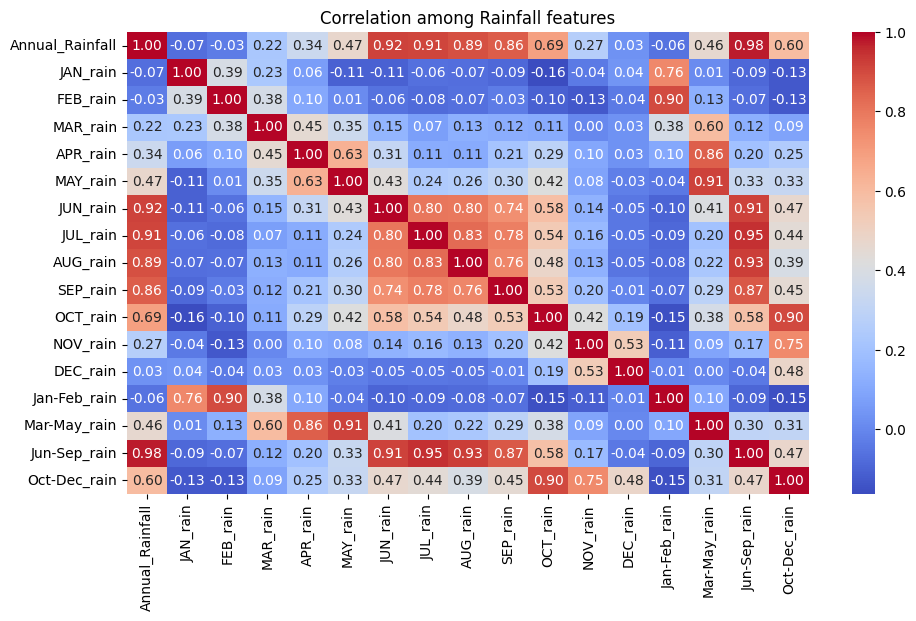

In [49]:
rain_cols= [col for col in yield_df.columns if 'rain' in col.lower()]
corr= yield_df[rain_cols].corr()

plt.figure(figsize= (11, 6))
sns.heatmap(corr, annot= True, cmap= 'coolwarm', fmt= ".2f")
plt.title('Correlation among Rainfall features')
plt.show()

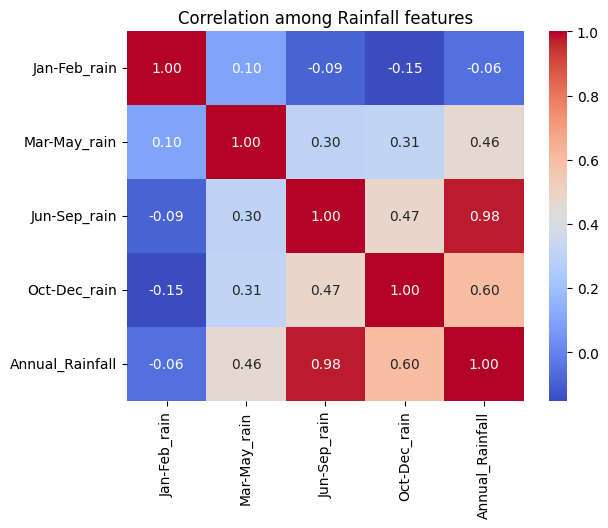

In [53]:
season_cols= ['Jan-Feb_rain', 'Mar-May_rain','Jun-Sep_rain', 'Oct-Dec_rain', 'Annual_Rainfall']
corr= yield_df[season_cols].corr()

# plt.figure(figsize= (11, 6))
sns.heatmap(corr, annot= True, cmap= 'coolwarm', fmt= ".2f")
plt.title('Correlation among Rainfall features')
plt.show()

In [54]:
# Variance Inflation Factor - Quantifies how much a feature in inflated due to multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

X= yield_df[rain_cols].dropna().copy()
vif_data= pd.DataFrame()
vif_data['Feature']= X.columns
vif_data['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data.sort_values(by="VIF", ascending=False)

,Feature,VIF
0,Annual_Rainfall,1435374784.326601
15,Jun-Sep_rain,1254889531.167787
7,JUL_rain,90268218.503475
8,AUG_rain,57841695.659971
6,JUN_rain,48107109.398066
14,Mar-May_rain,39914306.605060
16,Oct-Dec_rain,35883129.026085
9,SEP_rain,27862435.698314
10,OCT_rain,13828646.066557
5,MAY_rain,8632058.321397
